# A Discrete Convolution Program {-}

Denisa Bani

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Question 1: A Discrete Convolution Program {-}


A discrete convolution function, called myConv, convolves two arrays to obtain an output time series, $ {g_n} $. A fixed sampling interval is used  where $\Delta = 1$. The length of $ {g_n} $ will be the sum of the lengths of the two arrays inputted for convolution - 1. This is because during convolution, one matrix slides across the other until the last index of each matrix, which is why there is the -1.

In [2]:
def myConv(f,w):
    k = len(f) 
    n = len(w)
    if k <= n:
        f=w
        w=f
    w = w[::-1]
    conv_list=[]
    for i in range(k+n):
        if i< n-1:
            conv_list.append(np.dot(f[:(i+1)],w[-(i+1):]))
        if i >= n and i <= k :
            conv_list.append(np.dot(f[i-n:i],w))
        if i > k and i <= (k+n-1):
            conv_list.append(np.dot(f[i-n:], w[:(k-i)]))
    return conv_list 

### VALUE DIFFERENCES  {-}

In order to evaluate the effectiveness of myConv, the values at each index were compared to the values outputted by np.convolve. Random sine values were used to create the two arrays being convolved. 

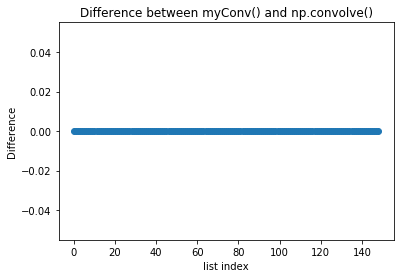

In [3]:
f = np.sin(np.random.random(100))
w = np.sin(np.random.random(50))

my_list = myConv(f,w)
numpy_list = np.convolve(f,w)

diff_list = np.array(my_list) - np.array(numpy_list)
plt.plot(np.arange(len(my_list)), diff_list, 'o-')
plt.xlabel('list index')
plt.ylabel('Difference')
plt.title('Difference between myConv() and np.convolve()')
plt.show()

The the horizontal line indicates that there are no noticable differences between myConv and np.convolve. 

### TIME DIFFERENCES  {-}

After testing that the outputted values match the expected results, the two functions will be timed to see if they run just as quickly. This is going to be done using the time.time module. 

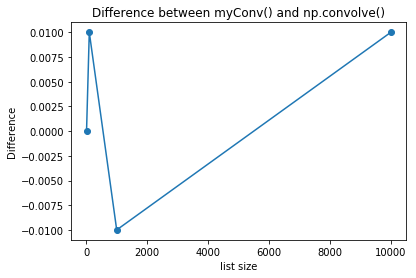

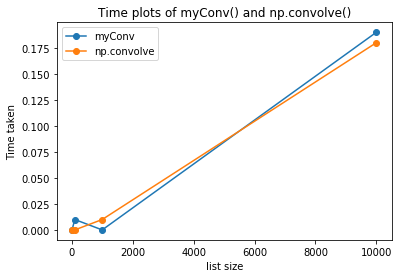

In [4]:
N = [10, 100, 1000, 10000]
time_diff= []
time_myConv=[]
time_numpy=[]

for num in N:
    f= np.sin(np.random.random(num))
    w= np.sin(np.random.random(num))
    
    t1 = time.time()
    g = myConv(f, w)
    t2 = time.time()
    my_time = (t2-t1)
    
    t1 = time.time()
    r = myConv(f, w)
    t2 = time.time()
    numpy_time = (t2-t1)
    
    time_myConv.append(my_time)
    time_numpy.append(numpy_time)
    time_diff.append(my_time - numpy_time)

plt.xlabel('list size')
plt.ylabel('Difference')
plt.title('Difference between myConv() and np.convolve()')
plt.plot(N, time_diff, 'o-')
plt.show()

plt.xlabel('list size')
plt.ylabel('Time taken')
plt.title('Time plots of myConv() and np.convolve()')
plt.plot(N, time_myConv,'o-', label = "myConv")
plt.plot(N, time_numpy,'o-', label = "np.convolve")
plt.legend()
plt.show()    

The time differences are very small but it seems that the myConv function runs a little slower than np.convolve. Though there are times when myConv can run quicker. This means that a major influencer of the speed of the functions are the random numbers generated to create the matrices being convolved. Since np.convolve has optimization features built in, it may more quickly compute larger randomly generated numbers (more decimal places), while for simpler data inputs requiring less memory space, myConv is quicker. Both functions take longer to convolve larger matrices.  

## Question 2: Simple Physical System: RL Circuit Response {-}

If we consider a simple physical system consisting of a resistor (with resistance R) an inductor (with inductance L) in series. We apply an input voltage a(t) across the pair in series, and measure the
output voltage b(t) across the inductor alone. For this linear system, the input voltage, a(t), is: 

$$ V_{input} = \frac{d}{dt}I(t) + \frac{R}{L}I(t)$$


The step response obtained when the input voltage a(t) = H(t) is:

$$ \frac{d}{dt}I(t) + \frac{R}{L}I(t) = \frac{H(t)}{L} $$

By applying an integrating factor, this becomes: 

$$ \int_\ e^{\frac{Rt}{L}}(\frac{d}{dt}I(t)+ \frac{R}{L}I(t)) dt = \int_\ e^{\frac{Rt}{L}}(\frac{H(t)}{L})dt $$

$$ e^{\frac{Rt}{L}}I(t) = \frac{L}{R}\frac{e^{\frac{Rt}{L}}}{L}H(t) - \frac{1}{R}\int_\ e^{\frac{Rt}{L}}\frac{d}{dt}H(t)$$

Let $\frac{d}{dt}H(t) = \delta(t)$. This gives us: 

$$ e^{\frac{Rt}{L}}I(t) = \frac{e^{\frac{Rt}{L}}}{R}H(t) - \frac{1}{R}\int_\ e^{\frac{Rt}{L}}\delta(t)$$

Using the fact that: $ \delta(t)f(t) = \delta(t)f(0)$

$$ e^{\frac{Rt}{L}}I(t) = \frac{e^{\frac{Rt}{L}}}{R}H(t) - \frac{1}{R}\int_\ \frac{d}{dt}H(t)$$

$$ e^{\frac{Rt}{L}}I(t) = \frac{H(t)}{R}(e^{\frac{Rt}{L}}-1) $$

This gives us 

$$ I(t) = \frac{H(t)}{R}(1 - e^{\frac{-Rt}{L}}) $$

If we plug this into our equation for voltage drop across an inductor, we get:

$$ V_{inductor} = L\frac{d}{dt}I(t) = \frac{L}{R}(\frac{d}{dt}H(t)(1-e^{\frac{Rt}{L}})+ H(t)(\frac{R}{L}e^{\frac{-Rt}{L}})) $$

$$ V_{inductor} = \frac{L}{R}(1- e^{\frac{-Rt}{L}}) + e^{\frac{-Rt}{L}}H(t)$$

$$ V_{inductor} = e^{\frac{-Rt}{L}}H(t) $$

On the other hand, if we let $\delta(t) = RI + L\frac{d}{dt}I(t)$

$$ \int_\ e^{\frac{Rt}{L}}(\frac{d}{dt}I(t)+ \frac{R}{L}I(t)) dt = \int_\ e^{\frac{Rt}{L}}(\frac{\delta(t)}{L})dt $$

$$ e^{\frac{Rt}{L}}I(t) = \frac{1}{L}\int_\ e^{\frac{R(0)}{L}}\delta(t) dt $$

$$ e^{\frac{Rt}{L}}I(t) = \frac{1}{L}\int_\ \frac{d}{dt}H(t) $$

Giving us:
$$  I(t) = \frac{H(t)}{L}(e^{\frac{-Rt}{L}}) $$ 

Solving this for voltage across an inductor: 

$$ V_{inductor} = L\frac{d}{dt}I(t) = \frac{d}{dt}\frac{H(t)}{L}e^{\frac{-Rt}{L}} $$

$$ V_{inductor} = \frac{d}{dt}H(t)e^{\frac{-Rt}{L}}+ H(t)(\frac{-R}{L}e^{\frac{-Rt}{L}})) $$

Using $ \delta(t)f(t) = \delta(t)f(0)$

$$ V_{inductor} = \delta(t) - H(t)(\frac{R}{L}e^{\frac{-Rt}{L}})) $$

RLresponse takes in an input series: $V_{in}$ sampled at $\Delta = dt$ and calculates output series $V_{out}$ sampled by the same dt. 

In [5]:
def RLresponse(R,L,V_in,dt,t): 
    impulse = (1/L)*np.exp(-R*t/L)
    I = np.convolve(V_in, impulse)*dt
    V_out = V_in - I[:len(t)]*R   
    return V_out

def delta(t,dt):
    vector = np.ones(len(t))
    vector[0]= 1/dt
    vector[1:]*0
    return vector
    
def s(t):
    return np.exp(-R*t/L)*np.heaviside(t,0.5)

def r(t):
    return delta(t,dt) - (R/L)*np.exp(-R*t/L)

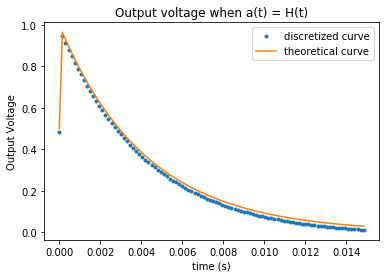

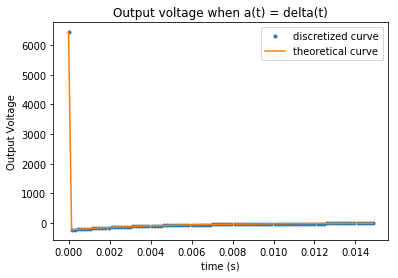

In [6]:
R= 950
L= 4  
t= 15*10**-3 
dt = 0.15*10**-3

t_arr = np.arange(0,t,dt)

V_in_step = np.heaviside(t_arr, 0.5)
V_in_impulse = delta(t_arr, dt)

V_out_step = RLresponse(R,L,V_in_step, dt, t_arr)
V_out_impulse = RLresponse(R,L,V_in_impulse, dt, t_arr)

Vtheory_step = s(t_arr)
Vtheory_impulse = r(t_arr)

plt.figure()
plt.plot(t_arr, V_out_step, ".",label = 'discretized curve')
plt.plot(t_arr, Vtheory_step, label= 'theoretical curve')
plt.xlabel('time (s)')
plt.ylabel("Output Voltage")
plt.title("Output voltage when a(t) = H(t)")
plt.legend()
plt.show()

plt.figure()
plt.plot(t_arr, V_out_impulse, ".", label = 'discretized curve')
plt.plot(t_arr, Vtheory_impulse, label = 'theoretical curve')
plt.xlabel('time (s)')
plt.ylabel("Output Voltage")
plt.title("Output voltage when a(t) = delta(t)")
plt.legend()
plt.show()

### Question 3: Convolution of Synthetic Seismograms

For a recent southern Pakistn earthquake, raw vertical synthetic seismogram for station RAYN was provided. The synthetic seismogram was plotted and convolved with a gaussian function.

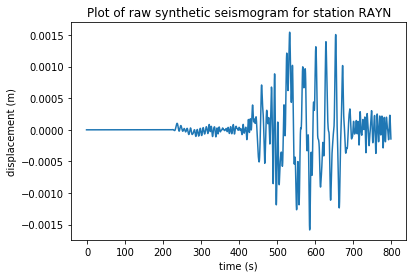

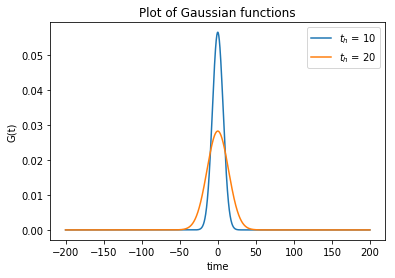

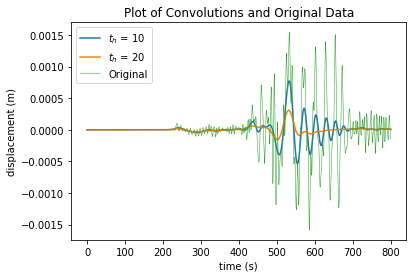

In [7]:
def g(t, t_h):
    return 1/(np.sqrt(np.pi)*t_h)*np.exp(-(t/t_h)**2)

data ="C:/Users/denis/Desktop/PHY408/Lab01/RAYN.II.LHZ.sem"
time, displ = np.loadtxt(data, skiprows = 0, unpack = True)
t = 800
dt = time[1]-time[0]

index_num= int(round(t/dt))

plt.plot (time[:index_num],displ[:index_num])
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.title('Plot of raw synthetic seismogram for station RAYN')
plt.show()
     
t_arr = np.arange(-t/4,t/4,dt)
y1 = g(t_arr,10)
y2 = g(t_arr,20)
plt.plot(t_arr, y1, label = '$t_h$ = 10')
plt.plot(t_arr, y2, label = '$t_h$ = 20')
plt.legend()
plt.xlabel('time')
plt.ylabel('G(t)')
plt.title('Plot of Gaussian functions')
plt.show()

con_1 = np.convolve(displ,y1, mode = 'same')*dt
con_2 = np.convolve(displ,y2, mode = 'same')*dt

t_con1= np.arange(0,len(con_1))*dt
t_con2= np.arange(0,len(con_2))*dt

plt.figure()
plt.plot(t_con1[:index_num], con_1[:index_num], label = '$t_h$ = 10')
plt.plot(t_con2[:index_num], con_2[:index_num], label = '$t_h$ = 20')
plt.plot(time[:index_num], displ[:index_num], label = 'Original', linewidth = 0.5)
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.title('Plot of Convolutions and Original Data')
plt.show()

When comparing the convoluted plot to the original, we can see that the peaks and troughs of the convoluted function matches the original data. In addition, when $t_h$ = 10, the amplitude of the plot is greater than when $t_h$ = 20  